## Fitter

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]
plt.style.use( "default" )

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

### Fitter for SN curve

Class `FitterForSnCurve` creates a fitter for the SN curve.

This fitter (not fitting) has a query function `getN` and represents the SN curve itself. For the given experimental data, the fitter assumes the linear relation between the `S` and `log(N)` if `S` is larger than the fatigue limit. Therefore, if a given `S` is less than or equal fatigue limit, the `getN` will return `-1` representing no fatigue damage is caused by the current `S`. Otherwise, `getN` will return the estimated `N` value representing the fatigue failure cycles under the current `S`.

#### Class initialization help

In [2]:
from ffpack.utils import FitterForSnCurve
help( FitterForSnCurve.__init__ )

Help on function __init__ in module ffpack.utils.fdrUtils:

__init__(self, data, fatigueLimit)
    Initialize a fitter for a SN curve based on the experimental data.
    
    Parameters
    ----------
    data: 2d array
        Experimental data for fitting in a 2D matrix,
        e.g., [ [ N1, S1 ], [ N2, S2 ], ..., [ Ni, Si ] ]
    
    fatigueLimit: scalar
        Fatigue limit indicating the minimum S that can cause fatigue.
    
    Raises
    ------
    ValueError
        If the data dimension is not 2.
        If the data length is less than 2.
        If the fatigueLimit is less than or equal 0.
        If N_i or S_i is less than or equal 0.
    
    Examples
    --------
    >>> from ffpack.utils import fitterForSnCurve
    >>> data = [ [ 10, 3 ], [ 1000, 1 ] ]
    >>> fatigueLimit = 0.5
    >>> fitterForSnCurve = FitterForSnCurve( data, fatigueLimit )



#### Function `getN` help

In [3]:
help( FitterForSnCurve.getN )

Help on function getN in module ffpack.utils.fdrUtils:

getN(self, S)
    Query fatigue life N for a given S
    
    Parameters
    ----------
    S: scalar
        Input S for fatigue life query.
    
    Returns
    -------
    rst: scalar
        Fatigue life under the query S. 
        If S is less than or equal fatigueLimit, -1 will be returned. 
    
    Raises
    ------
    ValueError
        If the S is less than or equal 0.
    
    Examples
    --------
    >>> rst = fitterForSnCurve.getN( 2 )



#### Example with default values

In [4]:
data = [ [ 10, 3 ], [ 1000, 1 ] ]
fatigueLimit = 0.5
fitterForSnCurve = FitterForSnCurve( data, fatigueLimit )

queryS = [ 0.2, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0 ]
calN = [ fitterForSnCurve.getN( s ) for s in queryS ]

for index, s in enumerate( queryS ):
    print( "Fatigue failure cycles at S == %s: " % s, "{:.2f}".format( calN[ index ] ) )

plotStartIndex = next( x[ 0 ] for x in enumerate( queryS ) if x[ 1 ] > fatigueLimit )

Fatigue failure cycles at S == 0.2:  -1.00
Fatigue failure cycles at S == 0.5:  -1.00
Fatigue failure cycles at S == 1.0:  1000.00
Fatigue failure cycles at S == 1.5:  316.23
Fatigue failure cycles at S == 2.0:  100.00
Fatigue failure cycles at S == 2.5:  31.62
Fatigue failure cycles at S == 3.0:  10.00
Fatigue failure cycles at S == 4.0:  1.00
Fatigue failure cycles at S == 5.0:  0.10


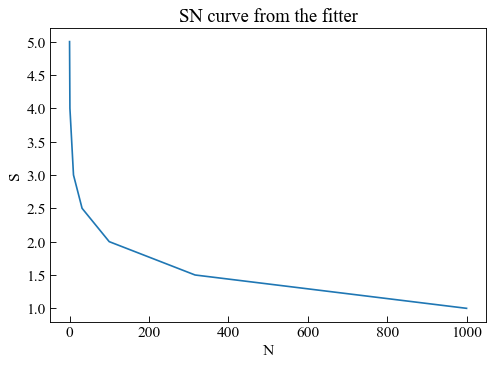

In [5]:
fig, ax = plt.subplots()

ax.plot( np.array( calN )[ plotStartIndex: ], 
         np.array( queryS )[ plotStartIndex: ] )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "S" )
ax.set_xlabel( "N" )
ax.set_title( "SN curve from the fitter" )

plt.tight_layout()
plt.show()